# Notebook for Master's Thesis

_Jonatan Haraldsson_ [jonhara@chalmers.se](mailto:jonhara@chalmers.se)

_Jesper Noord_ [noord@chalmers.se](mailto:noord@chalmers.se)



In [22]:
# relevant modules for this notebook
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
import emcee
import corner
import scipy
from scipy.stats import gamma, invgamma, t, norm, norminvgauss, mode, uniform
import seaborn as sns
import random
import sklearn
import scipy.constants as const
import random
import tqdm
from tqdm import trange
import keras as keras
import tensorflow as tf

# import  settings
import plot_settings
plot_settings.apply()

np.random.seed(123)

In [23]:
import pybamm


model = pybamm.lithium_ion.DFN()
print(model)

geometry = model.default_geometry



param = model.default_parameter_values

param.process_model(model)
param.process_geometry(geometry)

mesh = pybamm.Mesh(geometry, model.default_submesh_types, model.default_var_pts)

disc = pybamm.Discretisation(mesh, model.default_spatial_methods)
disc.process_model(model)



In [24]:
# for var in model.variables:
#     print(var)
for param,paramvals in zip(model.default_parameter_values.keys(),model.default_parameter_values.values()):
    print(f'{param} \t\t {paramvals}')

Ratio of lithium moles to SEI moles 		 2.0
SEI partial molar volume [m3.mol-1] 		 9.585e-05
SEI growth transfer coefficient 		 0.5
SEI reaction exchange current density [A.m-2] 		 1.5e-07
SEI resistivity [Ohm.m] 		 200000.0
SEI solvent diffusivity [m2.s-1] 		 2.5e-22
Bulk solvent concentration [mol.m-3] 		 2636.0
SEI open-circuit potential [V] 		 0.4
SEI electron conductivity [S.m-1] 		 8.95e-14
SEI lithium interstitial diffusivity [m2.s-1] 		 1e-20
Lithium interstitial reference concentration [mol.m-3] 		 15.0
Initial SEI thickness [m] 		 5e-09
EC initial concentration in electrolyte [mol.m-3] 		 4541.0
EC diffusivity [m2.s-1] 		 2e-18
SEI kinetic rate constant [m.s-1] 		 1e-12
SEI growth activation energy [J.mol-1] 		 0.0
Negative electrode reaction-driven LAM factor [m3.mol-1] 		 0.0
Positive electrode reaction-driven LAM factor [m3.mol-1] 		 0.0
Negative current collector thickness [m] 		 2.5e-05
Negative electrode thickness [m] 		 0.0001
Separator thickness [m] 		 2.5e-05
Positive

In [55]:
for v,V in zip(model.variables.keys(), model.variables.values()):
    #print(f"\t- {v}\t\t{V}")

SyntaxError: incomplete input (3490285470.py, line 2)

In [61]:
solver = model.default_solver
s = 3600
#t_eval = np.arange(0, s)
t_eval = np.linspace(0, s, 61)
solution = solver.solve(model, t_eval)

print(len(t_eval))


61


[[25. 25. 25. ... 25. 25. 25.]
 [25. 25. 25. ... 25. 25. 25.]
 [25. 25. 25. ... 25. 25. 25.]
 ...
 [25. 25. 25. ... 25. 25. 25.]
 [25. 25. 25. ... 25. 25. 25.]
 [25. 25. 25. ... 25. 25. 25.]]


ValueError: x and y must be the same size

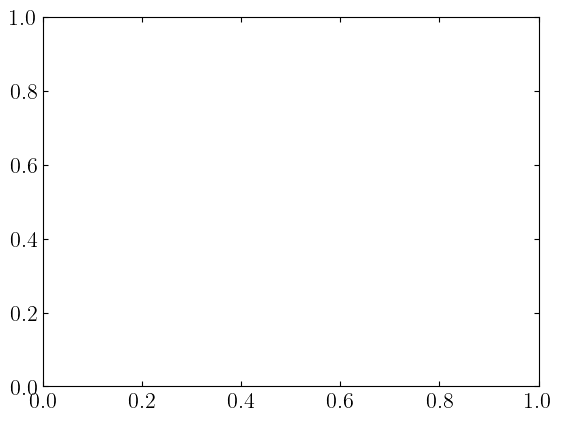

In [63]:


T = solution["Time [s]"].entries
V = solution["Cell temperature [C]"].entries

print(solution["Cell temperature [C]"].entries)
#print(len(solution["Cell temperature [C]"].entries))

plt.scatter(T, V)